## <center> Support Vector Machines (SVMs) in scikit-learn </center>

- They can be used for both classification and regression (SVCs, SVRs). In our case we'll use SVC to classify tumors into malignant or benign.
- The can work both on linear and non-linear data.
<br/>
<br/>
In logistic regression the purpose was to find the best separating line or what we like to call decision boundary for the classes. We did that by measuring the distance to all points.
What SVM does differently is to look for the largest margin between points on the sides of the decisional lines and these are support vectors.
The classification in this case may be more accurate because we add another layer of complexity to the model for decision making.<br><br>

* https://scikit-learn.org/stable/modules/svm.html
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

![](ml-sklearn/SVM.png)

D1 and D2 could be possible decision boundaries for the two classes, but D2 is the optimal choice since it maximizes the distance between these class points.
The idea is that the decision line has to stay as far as possible from the closest training instances.

**The kernel trick :**<br/>
We've seen that we quite easily deal with linear problems using SVMs. But how to deal with non-linear data (data that is not separable by a line) ?

In [ ]:
![](ml-sklearn/SVM2.png)


Here we have just one feature x1 and the data is not linearly separable. If we add another feature x2 which x1² then the data becomes linearly separable.  
So in this case we've just used something called polynomial features to make the data separable by a line. We can use this on very low complexity data for small datasets.  
But when the data becomes more complex and higher dimensional we can use the kernel trick. So with the kernel trick is like adding multiple polynomial features. It allows you to apply some sort of transformation to the data to change the original input space to a higher dimensional space in which it is goiing to be possible to find a linear separation for the data then to take to the original space where it becomes non-linear but visible.

In [ ]:
![](ml-sklearn/SVM3.png)


This trick is very praised because it saves computational complexity and burden. It has to do with calculating the scalar product of the transformed factors without having to deal with the transformation itself.

### Commonly used kernels:

- Linear.
- Polynomial.
- Radial basis function (RBF) - Gaussian RBF.
- Sigmoid.
- etc...

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#### Create and test the model :
1. Split the data.
2. Instanciate the C-Support Vector with the default parameters.

In [11]:
from sklearn.model_selection import train_test_split

# Fill here

# X_train, X_test, y_train, y_test ...

#### Let's evaluate the algorithm :

In [ ]:
# Fill here

#### Get support vector indices :


In [1]:
# Fill here

#### Get number of support vectors per class :
(We have two classes : Yes / No, Cancer not Cancer)


In [3]:
# Fill here

In [ ]:
X_train[:,1]

In [ ]:
X_train[:,1].shape

#### Plot some support_vectors, for some dimensions

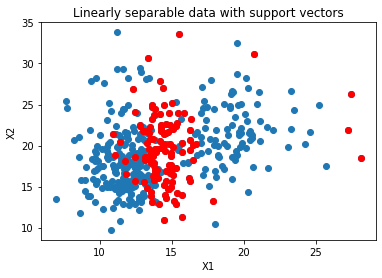

In [19]:
import matplotlib.pyplot as plt

# Get support vectors themselves
support_vectors = svm.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

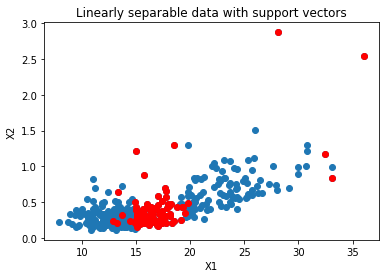

In [30]:
import matplotlib.pyplot as plt
# Get support vectors themselves
support_vectors = svm.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,20], X_train[:,10])
plt.scatter(support_vectors[:,20], support_vectors[:,10], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

***

### <center>Normalizing Data </center>
We cam improve performance by normalizing data  
SVMs are very sensitive to the scale, and data in our case is not scaled (i.e Normalized)
So let's try to see how each feature currently looks like or where exactly the minimum or the maximum of each feature is.

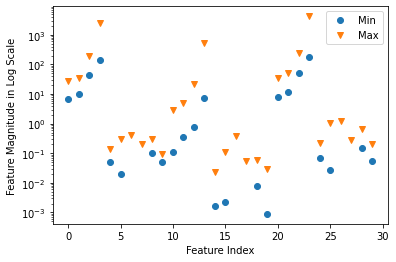

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

There are large gaps between the minimum and maximum of each value and also a difference in orders of magnitude in between features.  
This is a factor that leads to the low performance of our SVM.  

**Let's Normalize data !**  
We could simply use scalers that are built-in scikit-learn like the standard scalar or the min/max scalar and so on that are available in the pre-processing module.  
We are going to do it by hand to kind of better understand what data scaling means.  
Try to bring the values of each feature of each sample whitin a certain range like 0 to 1.

#### Normalize training  set :


In [4]:
# The minimum value of each feature
min_train = X_train.min(axis=0)

# The range of each feature by substracting the minimum from the maximum.
range_train = X_train.max(axis=0) - min_train

# Substract the minimum for each feature and divide by the range to bring data between 0 & 1
X_train_scaled = (X_train - min_train) / range_train

print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

#### Normalize test set :


In [5]:
# Fill here

#### Create model and train it on scaled set :

In [ ]:
# Fill here

#### Evaluate the algorithm :

In [7]:
# Fill here

It is much better but we are in a situation of under-fitting.


* * *

### <center> Hyper Parameter Tuning </center> 

What hyper parameter should we try adjusting first to improve the performance of the algorithm ?  
Let's try with C ang Gamma which control the complexity of the model.  

Intuitively : 

-  Gamma defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.  
The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors. It determines the distance a single data sample exerts influence on.

- C is The regularization parameter (lambda) serves as a degree of importance that is given to miss-classifications
The C parameter trades off misclassification of training examples against simplicity of the decision surface. 
A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors

C default value is 1 
Gamma default value is 'auto'.

#### Tune C parameter to improve results :

In [10]:
# Fill here

#### Evaluate the algorithm :

In [9]:
# Fill here

Performance is very good so no need to try with Gamma.

**Improvements :** 
As always, fine tuning can happen.

* * *

### <center> Advantages and Disadvantages of SVMs </center>

#### Stronger points:
 - Versatility which means they can do well on a varied range of datasets.
 - Can build complex decision boundaries on low-dimensional data.
 - Can work well on high-dimensional data with relatively small sample size.
 - etc...

#### Weaker points:
 - Don't perform well on high-dimensional data with many samples (i.e. > 100k).
 - Preprocessing may be required and this implies knowledge and understanding of hyper-parameters.
 - Harder to inspect and visualize.
 - etc.
 
#### Alternatives: 
 - Decision Trees and Random Forests (require less/no preprocessing of data, easier to understand, inspect, and visualize).
 
#### Good practices: 
- Data scaling.
- Other pre-processing.
- Choosing an appropriate kernel.
- Tuning hyper-parameters: C, gamma, etc. 